# Example API usage

Try out calling some of the API examples shown below, and try changing some of the parameters to see how the response changes

In [54]:
import json
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from IPython import display

In [3]:
import sys
!{sys.executable} -m pip install pip-system-certs


## Using the `GET` method

### [The Dog API](https://thedogapi.com/)

First, we need to specify the URL of the endpoint of the API, and then any parameters we want to tell the API what to return. These are defined in the linked documentation

In [25]:
dog_url = "https://api.thedogapi.com/v1/images/search"
dog_params = {
    'api_key':'b00634cc-d3b2-4d74-9b4d-83138c87c7d7',
    'size': 'small',
    'order': 'RANDOM',
    'limit': 1,
    'format':'src'
}

We'll submit a `GET` request with our parameters:

In [26]:
dog_response = requests.get(url=dog_url,
                           params=dog_params)

Let's check the response code:

In [6]:
dog_response.status_code

200

Hopefully this was `200` ("OK") - if so, we're good to go!

In this case we're recieving a byte stream, which we can open with `io` and `PIL`

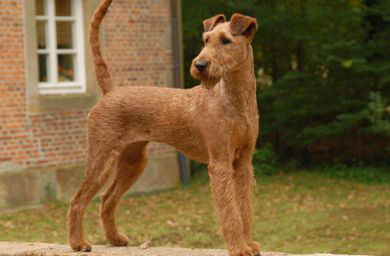

In [7]:
Image.open(BytesIO(dog_response.content))

## [Affirmations](https://www.affirmations.dev/)

No parameters for this one - just a random positive message

In [8]:
aff_response = requests.get(url='https://www.affirmations.dev/')

In this case, we'll use `requests`' inbuilt `.json()` method to get the response as a JSON object:

In [9]:
print(aff_response.json())

{'affirmation': 'You are a capable human'}


## [Nasa](https://api.nasa.gov/)

Again, specify the endpoint's URL and any necessary parameters

In [60]:
nasa_url = "https://api.nasa.gov/planetary/apod"
nasa_parameters = {
    "api_key":"DEMO_KEY"
}
nasa_response = requests.get(url=nasa_url, params=nasa_parameters)
nasa_response=nasa_response.json()
nasa_response

{'copyright': 'Mehmet Ergün',
 'date': '2023-02-22',
 'explanation': "Our Sun is becoming a busy place.  Only two years ago, the Sun was emerging from a solar minimum so quiet that months would go by without even a single sunspot.  In contrast, already this year and well ahead of schedule, our Sun is unusually active, already nearing solar activity levels seen a decade ago during the last solar maximum.  Our increasingly active Sun was captured two weeks ago sporting numerous interesting features. The image was recorded in a single color of light called Hydrogen Alpha, color-inverted, and false colored.  Spicules carpet much of the Sun's face.  The brightening towards the Sun's edges is caused by increased absorption of relatively cool solar gas and called limb darkening.  Just outside the Sun's disk, several scintillating prominences protrude, while prominences on the Sun's face are known as filaments and show as light streaks.  Magnetically tangled active regions are both dark and li

In [61]:
nasa_response_img = nasa_response['hdurl']

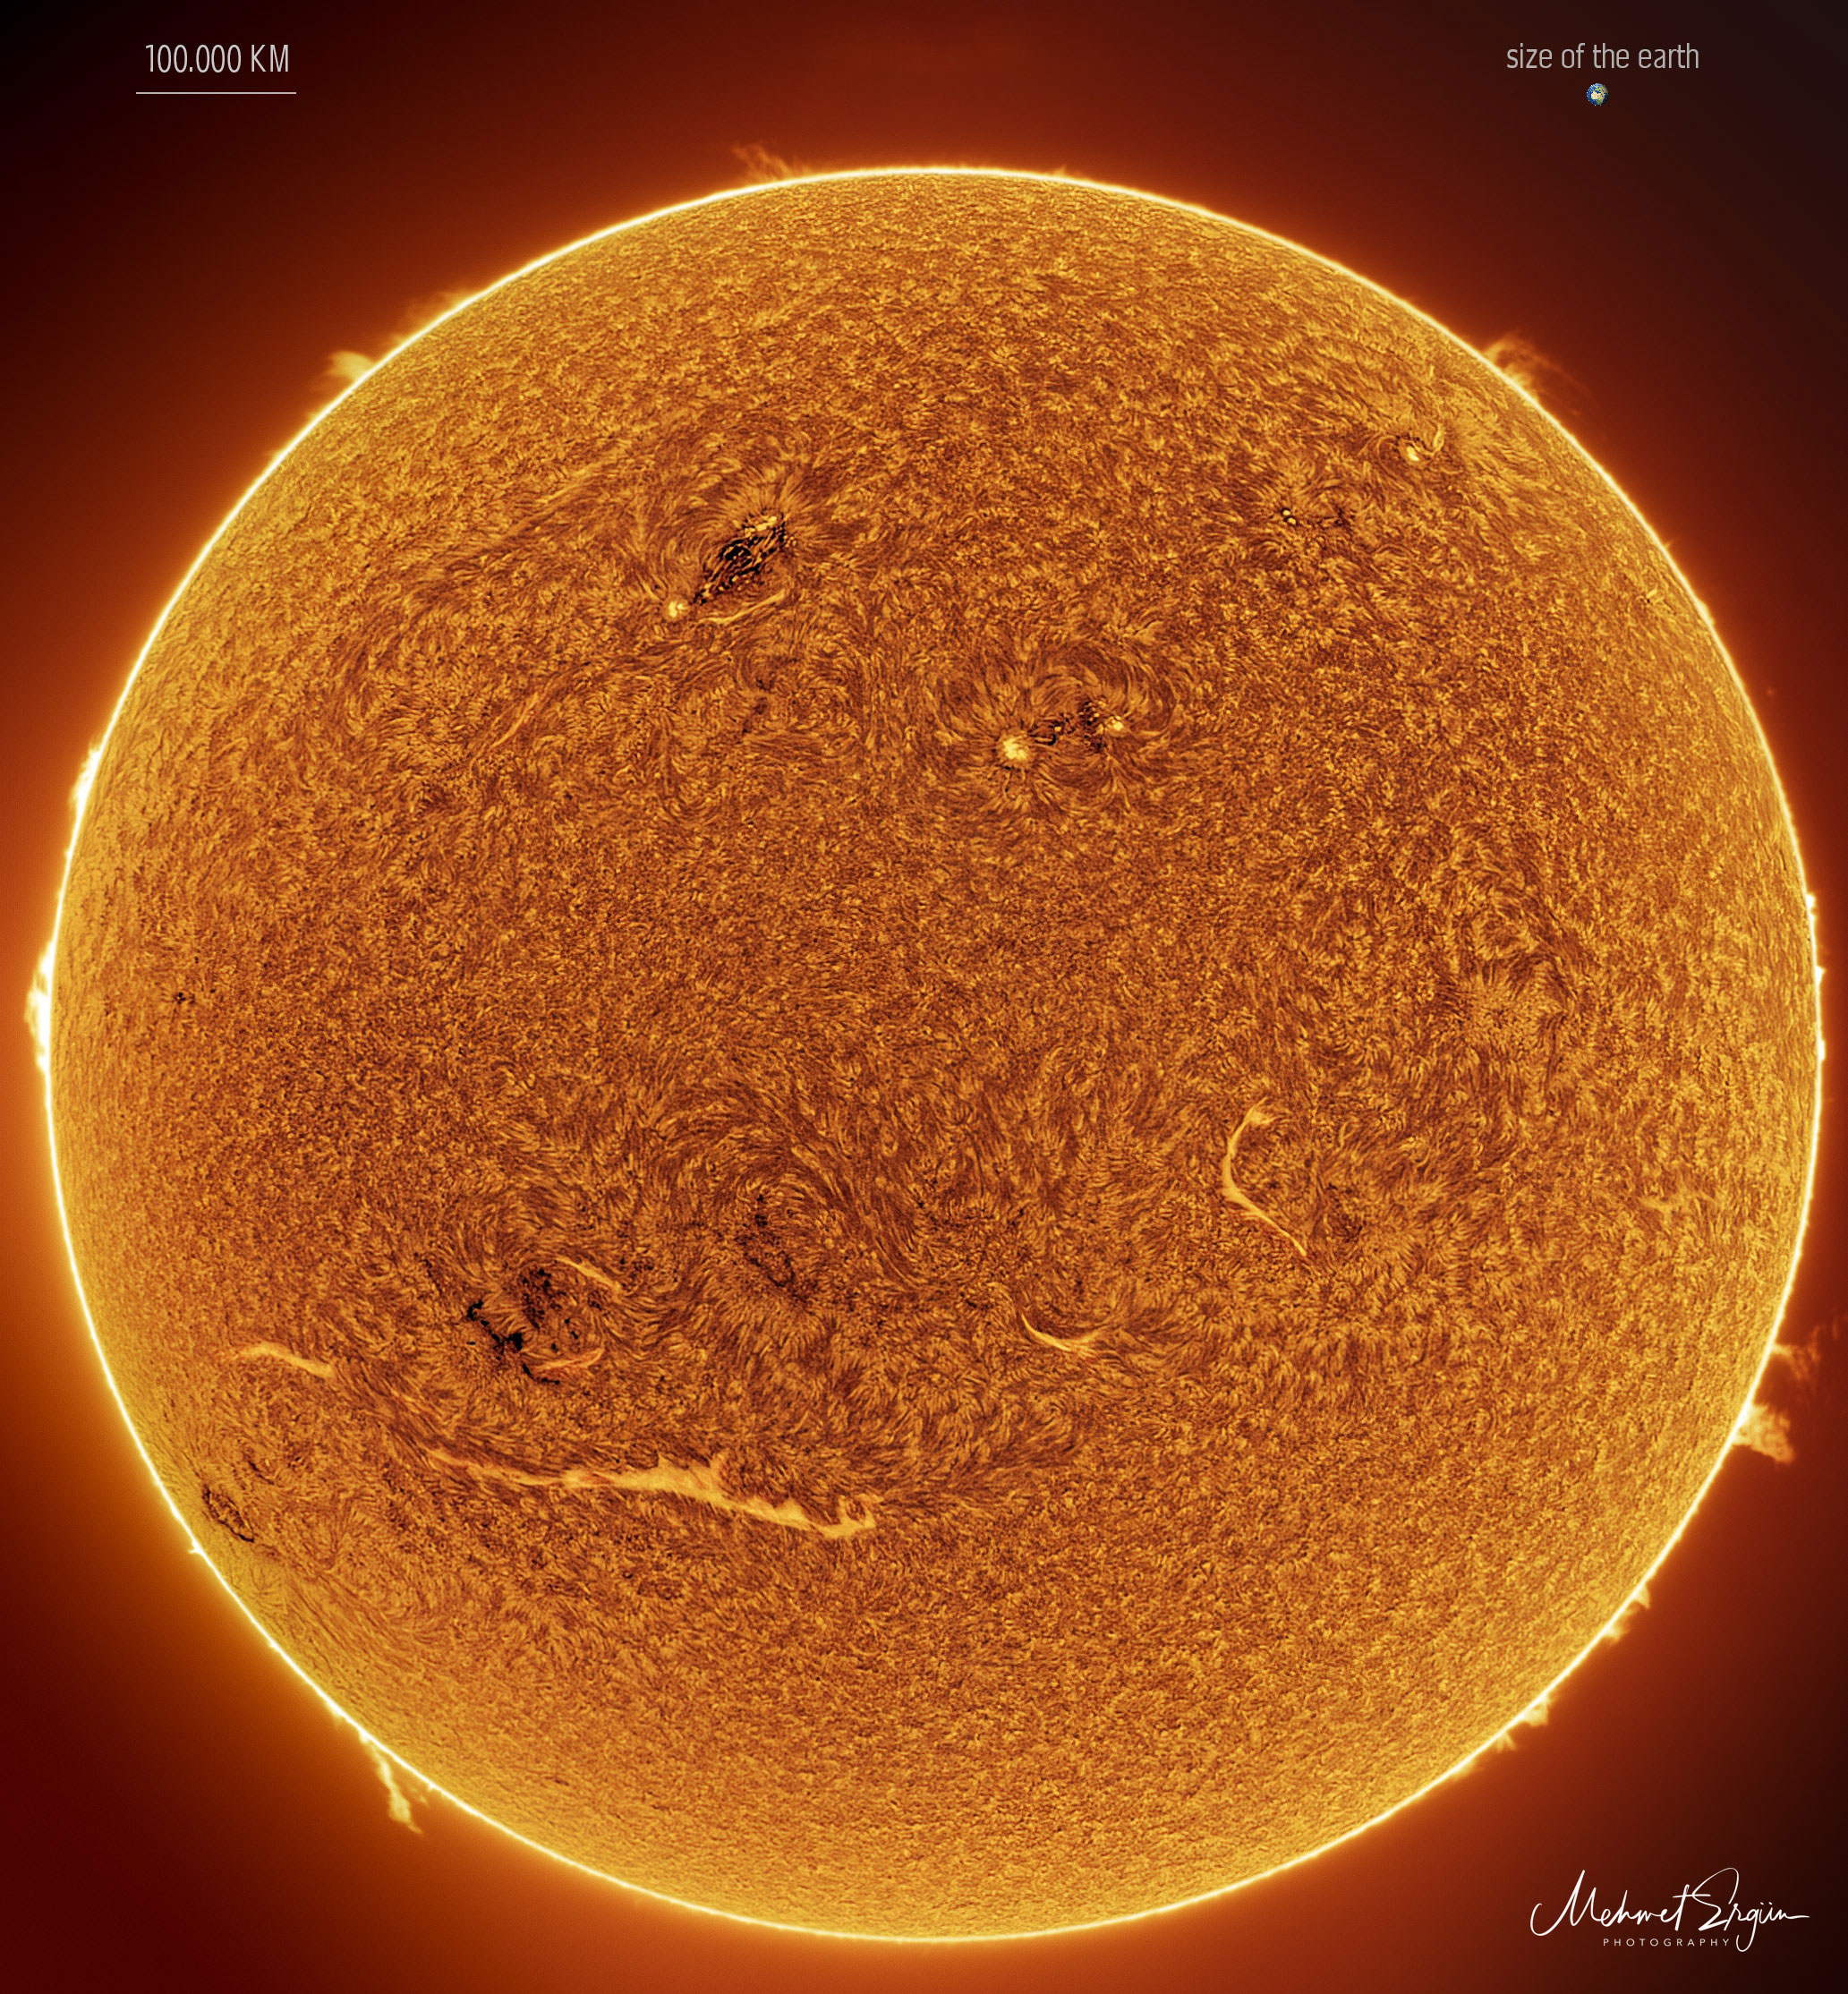

In [62]:
display.Image(nasa_response_img, width=500, height=500)

## [Numbers](http://numbersapi.com/#42)

In [31]:
NUMBER = 3
TYPE = "trivia" # one of "trivia", "math", "date", or "year"

# This API is set up slightly differently - each number has its own endpoint, 
# and there's very little to specify in the query parameters

numbers_url = f"http://numbersapi.com/{NUMBER}/{TYPE}"

numbers_params={'json':''}

numbers_response = requests.get(numbers_url, params=numbers_params)

print(numbers_response.json())

{'text': '3 is the number of words or phrases in a Tripartite motto.', 'number': 3, 'found': True, 'type': 'trivia'}


## [Using the `POST` method](https://reqres.in/)

For example, what if we want to register a new user with a service? We could send a `POST` request with the user's details to the API, which would then create a record for the user and confirm to us that it had done so.

In [63]:
post_url = "https://reqres.in/api/users"

post_params = {
    "name": "Richard Houston",
    "job": "CEO"
}

In [64]:
post_response = requests.post(url=post_url, data=post_params)

In this case, we get a `201` response code, which represents "create" - i.e. a confirmation that the requested resource was created.

In [65]:
post_response

<Response [201]>

In [66]:
post_response.json()

{'name': 'Richard Houston',
 'job': 'CEO',
 'id': '621',
 'createdAt': '2023-02-22T17:30:43.094Z'}